# Código adaptado de: https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras/blob/master/chapter3-autoencoders/autoencoder-mnist-3.2.1.py

**Discentes: Amanda Lins, Yasmin Bonfim e Iuri Matos**

**Docente: Flávios dos Santos Conterato**

**Matéria: Machine Learning e Deep Learning**

*Atividade Aula 15 - AutoEncoder*

# Codigo principal


In [ ]:
'''Example of autoencoder model on MNIST dataset

This autoencoder has modular design. The encoder, decoder and autoencoder
are 3 models that share weights. For example, after training the
autoencoder, the encoder can be used to  generate latent vectors
of input data for low-dim visualization like PCA or TSNE.
'''

#Importação das bibliotecas

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
import keras
from keras import Input
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Carregando o dataset MNIST e o separando em treino e teste
#No entanto, não vamos precisar carregar os dados de Y, já que ele não será utilizado no modelo
(x_train, _), (x_test, _) = mnist.load_data()

# Normalização das imagens
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#Verificando a quantidade de dados de treino e teste
print('Dados de treino:',x_train.shape[0],'Dados de teste:',  x_test.shape[0])

Dados de treino: 60000 Dados de teste: 10000


In [ ]:
image_size = x_train.shape[1]

In [ ]:
# parametros da rede
input_shape = (image_size, image_size, 1)
batch_size = 32
latent_dim = 16

In [ ]:
#limpar a sessão
tf.keras.backend.clear_session()

In [ ]:
#Inicio da rede
#Decidindo suas funções de ativação e a quantidades das camadas a serem trabalhadas
#Criação do MLP
# Definindo Encoder
input = Input(shape=(784,))
encoder= Dense(128, activation = 'relu')(input)
encoder = Dense(64, activation = 'relu')(encoder)
encoder = Dense(64, activation = 'relu')(encoder)
encoder= Dense(latent_dim, activation = 'relu')(encoder)

#Definição do espaço latente
latent_space = Input(shape=(latent_dim,))


# decoder= Dense(64, activation = 'relu')(decoder)
# Definindo decoder
decoder= Dense(latent_dim, activation = 'relu')(latent_space)
decoder = Dense(32, activation = 'relu')(decoder)
decoder = Dense(64, activation = 'relu')(decoder)
decoder = Dense(128, activation = 'relu')(decoder)
outputs = Dense(input_shape[0],activation = 'sigmoid')(decoder)


encodeed = Model(input, encoder)
decodeed = Model(latent_space,outputs)
# Definindo autoencoder
autoencoder = Model(input, decodeed(encodeed(input)))
# Definindo treino
autoencoder.compile(optimizer='adamax', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train, epochs=100, batch_size=batch_size,shuffle=True, verbose=1, validation_data=(x_test,x_test))

Epoch 1/100
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2750 - val_loss: 0.1872
Epoch 2/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1789 - val_loss: 0.1572
Epoch 3/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1558 - val_loss: 0.1488
Epoch 4/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1486 - val_loss: 0.1427
Epoch 5/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1426 - val_loss: 0.1381
Epoch 6/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1383 - val_loss: 0.1349
Epoch 7/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1346 - val_loss: 0.1316
Epoch 8/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1319 - val_loss: 0.1298
Epoch 9/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1294 - val_loss: 0.1260
Epoch 10/100
1875/1875 [==============================] - 10s 5m

# Resumos visuais do codigo e seu funcionamento

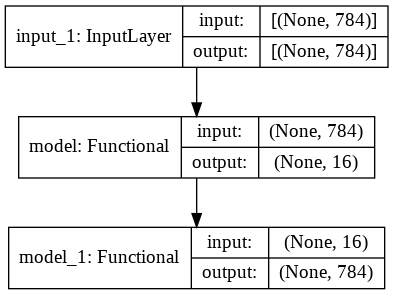

In [ ]:
#Resumo do modelo
plot_model(autoencoder, show_shapes=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                1040      
Total params: 113,936
Trainable params: 113,936
Non-trainable params: 0
_________________________________________________________________


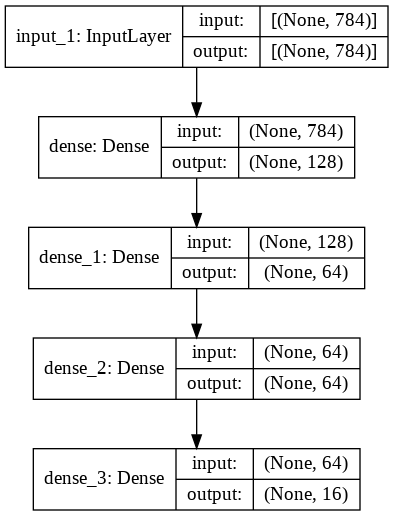

In [ ]:
#Resumo do encoder
encodeed.summary()
plot_model(encodeed,
           show_shapes=True)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 784)               101136    
Total params: 112,384
Trainable params: 112,384
Non-trainable params: 0
_____________________________________________________

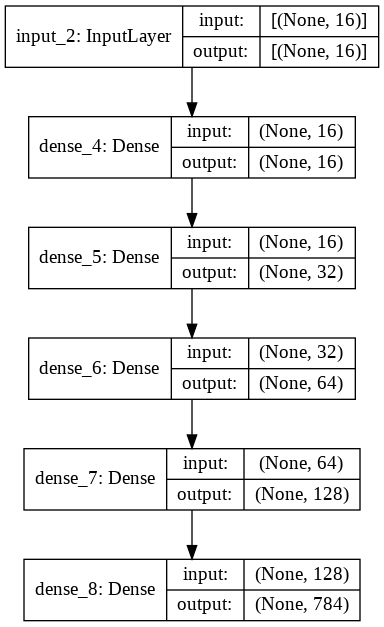

In [ ]:
#Resumo do decoder
decodeed.summary()
plot_model(decodeed,
           show_shapes=True)

# Visualização de resultados

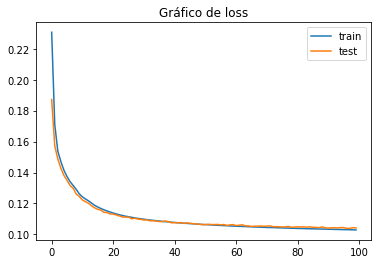

In [ ]:
#Grafico de loss

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.title('Gráfico de loss')
pyplot.legend()
pyplot.show()

In [ ]:
# Predizer saida do autoencoder do teste
x_decoded = autoencoder.predict(x_test)

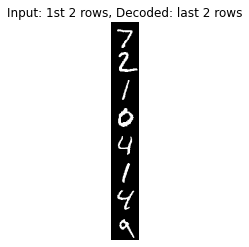

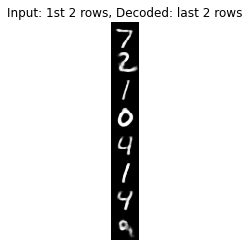

In [ ]:
# Mostrar primeiras 8 entradas do teste e saidas do decoder
imgs = x_test[:8]
imgs = imgs.reshape((-1, 1, 28, 28))
imgs = np.vstack([np.hstack(i) for i in imgs])


plt.figure()
plt.axis('off')
plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
#plt.savefig('input_and_decoded.png')
plt.show()

imgs_decoded = x_decoded[:8]
imgs_decoded = imgs_decoded.reshape((-1, 1, 28, 28))
imgs_decoded = np.vstack([np.hstack(i) for i in imgs_decoded])

plt.figure()
plt.axis('off')
plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs_decoded, interpolation='none', cmap='gray')
#plt.savefig('input_and_decoded.png')
plt.show()